<a href="https://colab.research.google.com/github/filipesartori/Inteligencia-Artificial/blob/main/PLN_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLN com Python

## Bibliotecas

In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [2]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=c0847108550456a7ec460e297727ddf10dfe8fe60a7606f2946a2627b9ae3afc
  Stored in directory: /tmp/pip-ephem-wheel-cache-39ez3h7h/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


## Marcação POS


*   POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
*   Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
* Lista de tokens: https://spacy.io/api/annotation#pos-tagging
* Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/






In [3]:
pln = spacy.load('pt')

In [4]:
doc = pln('Estou indo e focado na academia, irei ficar enorme')

In [5]:
for token in doc:
  print(token.text, token.pos_)

Estou AUX
indo VERB
e CCONJ
focado VERB
na PROPN
academia PROPN
, PUNCT
irei PROPN
ficar VERB
enorme ADJ


## Lematização e stemização

In [6]:
for token in doc:
  print(token.text, token.lemma_)

Estou Estou
indo ir
e e
focado focar
na o
academia academiar
, ,
irei irar
ficar ficar
enorme enorme


In [7]:
import nltk 
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [8]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('conversar')

'convers'

In [9]:
for token in doc:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
indo ir ind
e e e
focado focar foc
na o na
academia academiar academ
, , ,
irei irar ire
ficar ficar fic
enorme enorme enorm


## Texts loading

In [10]:
dados = urllib.request.urlopen('https://www.bbc.com/portuguese/brasil-59190480')

In [11]:
dados = dados.read()
dados

b'<!doctype html><html lang="pt-BR" class="no-js" dir="ltr"><head><meta data-react-helmet="true" http-equiv="X-UA-Compatible" content="IE=edge"/><meta data-react-helmet="true" charSet="utf-8"/><meta data-react-helmet="true" name="robots" content="noodp,noydir"/><meta data-react-helmet="true" name="theme-color" content="#B80000"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1"/><meta data-react-helmet="true" name="apple-mobile-web-app-title" content="BBC News Brasil"/><meta data-react-helmet="true" name="application-name" content="BBC News Brasil"/><meta data-react-helmet="true" name="description" content="BBC, New York Times e CNN estiveram entre ve\xc3\xadculos que repercutiram a morte da cantora de 26 anos em queda de avi\xc3\xa3o em Minas Gerais."/><meta data-react-helmet="true" property="fb:admins" content="100004154058350"/><meta data-react-helmet="true" property="fb:app_id" content="1609039196070050"/><meta data-react-

In [12]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="pt-BR"><head><meta content="IE=edge" data-react-helmet="true" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-react-helmet="true"/><meta content="noodp,noydir" data-react-helmet="true" name="robots"/><meta content="#B80000" data-react-helmet="true" name="theme-color"/><meta content="width=device-width, initial-scale=1, minimum-scale=1" data-react-helmet="true" name="viewport"/><meta content="BBC News Brasil" data-react-helmet="true" name="apple-mobile-web-app-title"/><meta content="BBC News Brasil" data-react-helmet="true" name="application-name"/><meta content="BBC, New York Times e CNN estiveram entre veículos que repercutiram a morte da cantora de 26 anos em queda de avião em Minas Gerais." data-react-helmet="true" name="description"/><meta content="100004154058350" data-react-helmet="true" property="fb:admins"/><meta content="1609039196070050" data-react-helmet="true" property="fb:app_id"/><meta content="285361880228,1921

In [13]:
paragrafo = dados_html.find_all('p')

In [14]:
len(paragrafo)

30

In [15]:
conteudo = ''
for p in paragrafo:
  conteudo += p.text

In [16]:
conteudo

'Crédito, DIVULGAÇÃOMarília Mendonça tinha 26 anos e era um dos maiores sucessos musicais do BrasilA morte da cantora sertaneja Marília Mendonça em um acidente de avião em Minas Gerais foi destaque na capa dos sites de alguns dos principais veículos de imprensa do mundo na sexta-feira e neste sábado, como Guardian, Washington Post, La Repubblica e Spiegel.O americano New York Times disse que "suas legiões de fãs foram empoderadas pelas letras de suas canções, que imploravam às mulheres que rejeitassem relacionamentos ruins e abusivos, e contavam histórias de personagens imperfeitos.""Mendonça foi uma sensação nas redes sociais, com 7,8 milhões de seguidores no Twitter, 22 milhões no YouTube e mais de 38 milhões no Instagram."O jornal destacou as manifestações de pesar do presidente Jair Bolsonaro e da cantora Anitta.E também lembrou uma reportagem de 2019 da NPR, a rede de rádios públicas dos Estados Unidos, que falava que "alguns nos círculos cosmopolitas do Brasil desprezam as balada

In [17]:
conteudo = conteudo.lower()
conteudo

'crédito, divulgaçãomarília mendonça tinha 26 anos e era um dos maiores sucessos musicais do brasila morte da cantora sertaneja marília mendonça em um acidente de avião em minas gerais foi destaque na capa dos sites de alguns dos principais veículos de imprensa do mundo na sexta-feira e neste sábado, como guardian, washington post, la repubblica e spiegel.o americano new york times disse que "suas legiões de fãs foram empoderadas pelas letras de suas canções, que imploravam às mulheres que rejeitassem relacionamentos ruins e abusivos, e contavam histórias de personagens imperfeitos.""mendonça foi uma sensação nas redes sociais, com 7,8 milhões de seguidores no twitter, 22 milhões no youtube e mais de 38 milhões no instagram."o jornal destacou as manifestações de pesar do presidente jair bolsonaro e da cantora anitta.e também lembrou uma reportagem de 2019 da npr, a rede de rádios públicas dos estados unidos, que falava que "alguns nos círculos cosmopolitas do brasil desprezam as balada

## Busca com SpaCy

In [18]:
pln = spacy.load('pt')

In [35]:
string = 'música'
token_pesquisa = pln(string)

In [36]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [37]:
doc2 = pln(conteudo)
matches = matcher(doc2)
matches

[(8661325627334373315, 239, 240),
 (8661325627334373315, 366, 367),
 (8661325627334373315, 625, 626)]

In [42]:
doc2[239:240], doc2[239-5:240+5]

(música, chamado 'feminejo' — música por e para mulheres".a npr)

In [43]:
doc2[366:367], doc2[366-5:367+5]

(música,
 "um dos maiores nomes da música country brasileira conhecida como sertanejo)

In [44]:
doc2[625:626], doc2[625-5:626+5]

(música,
 que transportava a cantora de música sertaneja marília mendonça foi alvo)

In [51]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2]+ numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"  
display(HTML(f"""... {texto} ... """))  

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [52]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

divulgaçãomarília mendonça PER
sertaneja marília ORG
minas gerais LOC
guardian PER
washington post PER
la repubblica ORG
spiegel.o americano new york times ORG
twitter MISC
youtube MISC
jair bolsonaro PER
npr ORG
estados unidos LOC
brasil LOC
npr ORG
mulheres".a npr MISC
marília mendonça PER
grammy MISC
avião".a cnn MISC
sexta-feira".a LOC
bbc ORG
grammy MISC
mendonça PER
bbc news ORG
mendonça PER
bbc news ORG
internet MISC
youtube MISC
brasil LOC
marília mendonça PER
piedade de caratinga LOC
marília LOC
beechcraft PER
caratinga LOC
piedade LOC
sertaneja marília mendonça ORG
pec ORG
— PER
bbc news ORG
bbc ORG
bbc ORG
leia PER


In [53]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvens de palavras e stop words

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

In [64]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [65]:
len(lista_token)

777

In [66]:
stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    stop.append(palavra)

In [67]:
len(stop)

510

In [58]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['blue', 'red', 'purple', 'green'])

In [61]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'black', max_words = 100, colormap=color_map)

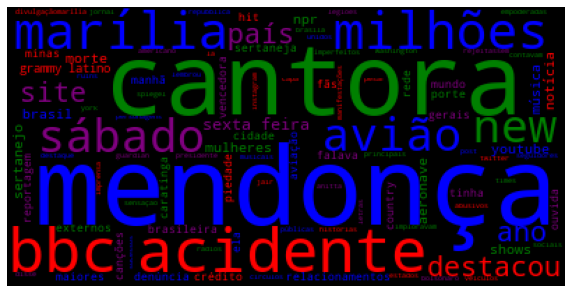

In [68]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(stop))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()